In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
class Filters:
    # Sharpen, Blur, Canny
    def __init__(self, imagePath, kernel):
        self.image = cv2.imread(imagePath)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.kernel = kernel

    def convolution_rgb_image(self, image, kernel):
        image_height, image_width, image_depth = image.shape
        kernel_height, kernel_width = kernel.shape
        output_matrix = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1, image_depth))

        for d in range(image_depth):
            for y in range(image_height - kernel_height + 1):
                for x in range(image_width - kernel_width + 1):
                    output_matrix[y, x, d] = np.sum(kernel * image[y : y + kernel_height, x : x + kernel_width, d])

        return output_matrix

    def canny(self):
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5,5), 0)
        sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
        mag = np.sqrt(sobelx**2 + sobely**2)
        return mag

    def showAll(self):
        fig, axs = plt.subplots(1, 6, figsize=(12, 5))
        titles = ["Original image", "Custom kernel", "Edge detection", "Sharpened image", "Blurred image"]
        arrays = [
            np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
            self.kernel,
            np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
            np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
            (1 / 9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
        ]
        for index, item in enumerate(range(len(axs)-1)):
            axs[index].set_title(titles[index])
            axs[index].set_xticks([])
            axs[index].set_yticks([])
            axs[index].imshow(self.convolution_rgb_image(self.image, arrays[index]).astype(np.uint8))
        axs[index+1].set_title("Canny")
        axs[index+1].set_xticks([])
        axs[index+1].set_yticks([])
        axs[index+1].imshow(self.canny())

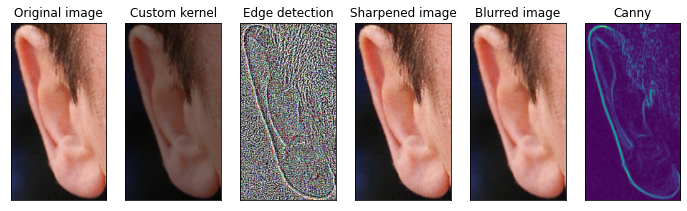

In [4]:
filteri = Filters("./test_img.png", ((1 / 18) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])))
filteri.showAll()